# British Airways Passenger Review Analysis

## The data below was scraped from Skytrax, at www.airlinequality.com. It consists of 1000 reviews left by passengers of British Airways. The purpose of the following analysis is to form a picture of the types (positive/neutral/negative) and sentiment intensities of the reviews as a whole.

In [7]:
import pandas as pd

In [46]:
#Read data into a dataframe.
df = pd.read_csv('BA_reviews.csv')

In [9]:
df.head(20)

,Unnamed: 0,reviews
0,0,Not Verified | My wife and I are very disappo...
1,1,Not Verified | We flew BA between Heathrow an...
2,2,Not Verified | Absolutely disgusted with BA. ...
3,3,Not Verified | Took a trip to Nashville with m...
4,4,Not Verified | A nightmare journey courtesy o...
5,5,✅ Trip Verified | Absolutely atrocious. LHR-OR...
6,6,✅ Trip Verified | As someone who flies relentl...
7,7,✅ Trip Verified | Flew with British Airways ...
8,8,✅ Trip Verified | Straightforward check in T...
9,9,Not Verified | I am beyond upset and disgusted...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Remove unneeded characters from each review.

In [11]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [12]:
df.head(20)

,Unnamed: 0,reviews
0,0,My wife and I are very disappointed with fly...
1,1,We flew BA between Heathrow and Berlin one w...
2,2,Absolutely disgusted with BA. Our flights we...
3,3,Took a trip to Nashville with my wife for a l...
4,4,A nightmare journey courtesy of British Airw...
5,5,Absolutely atrocious. LHR-ORD-LHR Round-trip....
6,6,As someone who flies relentlessly with Britis...
7,7,Flew with British Airways club Europe on Sa...
8,8,Straightforward check in T5. New site for c...
9,9,I am beyond upset and disgusted with the disr...


In [49]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the letters
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews
0,0,Not Verified | My wife and I are very disappo...,Not Verified My wife and I are very disappoint...
1,1,Not Verified | We flew BA between Heathrow an...,Not Verified We flew BA between Heathrow and B...
2,2,Not Verified | Absolutely disgusted with BA. ...,Not Verified Absolutely disgusted with BA Our ...
3,3,Not Verified | Took a trip to Nashville with m...,Not Verified Took a trip to Nashville with my ...
4,4,Not Verified | A nightmare journey courtesy o...,Not Verified A nightmare journey courtesy of B...


### Begin the process of classifying words in the reviews into parts of speech.

In [14]:
import nltk


nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Larry
[nltk_data]     Coty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Larry
[nltk_data]     Coty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Larry
[nltk_data]     Coty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Larry
[nltk_data]     Coty\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Larry Coty\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,reviews,Cleaned Reviews,POS tagged
0,0,My wife and I are very disappointed with fly...,My wife and I are very disappointed with flyi...,"[(wife, n), (disappointed, a), (flying, v), (B..."
1,1,We flew BA between Heathrow and Berlin one w...,We flew BA between Heathrow and Berlin one wa...,"[(flew, v), (BA, n), (Heathrow, n), (Berlin, n..."
2,2,Absolutely disgusted with BA. Our flights we...,Absolutely disgusted with BA Our flights were...,"[(Absolutely, r), (disgusted, v), (BA, n), (fl..."
3,3,Took a trip to Nashville with my wife for a l...,Took a trip to Nashville with my wife for a l...,"[(Took, v), (trip, n), (Nashville, n), (wife, ..."
4,4,A nightmare journey courtesy of British Airw...,A nightmare journey courtesy of British Airwa...,"[(nightmare, a), (journey, n), (courtesy, n), ..."


### Begin the process of lemmatization.

In [16]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma
0,0,My wife and I are very disappointed with fly...,My wife and I are very disappointed with flyi...,"[(wife, n), (disappointed, a), (flying, v), (B...",wife disappointed fly British Airways flight...
1,1,We flew BA between Heathrow and Berlin one w...,We flew BA between Heathrow and Berlin one wa...,"[(flew, v), (BA, n), (Heathrow, n), (Berlin, n...",fly BA Heathrow Berlin one way connection ex...
2,2,Absolutely disgusted with BA. Our flights we...,Absolutely disgusted with BA Our flights were...,"[(Absolutely, r), (disgusted, v), (BA, n), (fl...",Absolutely disgust BA flight cancel May BA e...
3,3,Took a trip to Nashville with my wife for a l...,Took a trip to Nashville with my wife for a l...,"[(Took, v), (trip, n), (Nashville, n), (wife, ...",Took trip Nashville wife leisure break Arriv...
4,4,A nightmare journey courtesy of British Airw...,A nightmare journey courtesy of British Airwa...,"[(nightmare, a), (journey, n), (courtesy, n), ...",nightmare journey courtesy British Airways b...


In [17]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


### Use vaderSentiment to classify type and intensity of each review.

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,0,My wife and I are very disappointed with fly...,My wife and I are very disappointed with flyi...,"[(wife, n), (disappointed, a), (flying, v), (B...",wife disappointed fly British Airways flight...,-0.7964,Negative
1,1,We flew BA between Heathrow and Berlin one w...,We flew BA between Heathrow and Berlin one wa...,"[(flew, v), (BA, n), (Heathrow, n), (Berlin, n...",fly BA Heathrow Berlin one way connection ex...,0.9874,Positive
2,2,Absolutely disgusted with BA. Our flights we...,Absolutely disgusted with BA Our flights were...,"[(Absolutely, r), (disgusted, v), (BA, n), (fl...",Absolutely disgust BA flight cancel May BA e...,-0.8479,Negative
3,3,Took a trip to Nashville with my wife for a l...,Took a trip to Nashville with my wife for a l...,"[(Took, v), (trip, n), (Nashville, n), (wife, ...",Took trip Nashville wife leisure break Arriv...,0.8655,Positive
4,4,A nightmare journey courtesy of British Airw...,A nightmare journey courtesy of British Airwa...,"[(nightmare, a), (journey, n), (courtesy, n), ...",nightmare journey courtesy British Airways b...,-0.6124,Negative


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    462
Negative    427
Neutral     111
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1bf2bb64680>,
 [Text(0.13100683356568746, 1.0921708701293458, 'Positive'),
  Text(-0.4963079590628943, -0.9816712330362058, 'Negative'),
  Text(1.033793144505799, -0.3758613233265859, 'Neutral')],
 [Text(0.07145827285401132, 0.5957295655250977, '46.2%'),
  Text(-0.27071343221612415, -0.5354570362015667, '42.7%'),
  Text(0.5638871697304357, -0.2050152672690468, '11.1%')])

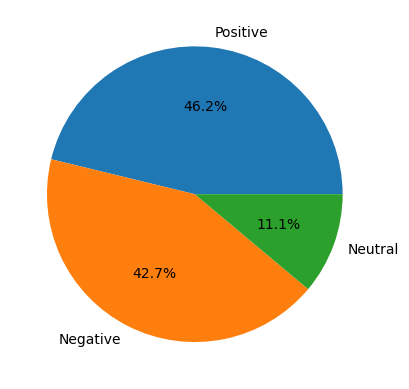

In [21]:
plt.pie(vader_counts.values, labels = vader_counts.index, autopct='%1.1f%%')

### From the pie chart above, we can see that positive and negative reviews predominate, which is to be expected.


In [22]:
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,0,My wife and I are very disappointed with fly...,My wife and I are very disappointed with flyi...,"[(wife, n), (disappointed, a), (flying, v), (B...",wife disappointed fly British Airways flight...,-0.7964,Negative
1,1,We flew BA between Heathrow and Berlin one w...,We flew BA between Heathrow and Berlin one wa...,"[(flew, v), (BA, n), (Heathrow, n), (Berlin, n...",fly BA Heathrow Berlin one way connection ex...,0.9874,Positive
2,2,Absolutely disgusted with BA. Our flights we...,Absolutely disgusted with BA Our flights were...,"[(Absolutely, r), (disgusted, v), (BA, n), (fl...",Absolutely disgust BA flight cancel May BA e...,-0.8479,Negative
3,3,Took a trip to Nashville with my wife for a l...,Took a trip to Nashville with my wife for a l...,"[(Took, v), (trip, n), (Nashville, n), (wife, ...",Took trip Nashville wife leisure break Arriv...,0.8655,Positive
4,4,A nightmare journey courtesy of British Airw...,A nightmare journey courtesy of British Airwa...,"[(nightmare, a), (journey, n), (courtesy, n), ...",nightmare journey courtesy British Airways b...,-0.6124,Negative


In [23]:
df.describe()

,Unnamed: 0,Sentiment
count,1000.000000,1000.000000
mean,499.500000,0.151554
std,288.819436,0.749134
min,0.000000,-0.992100
25%,249.750000,-0.672950
50%,499.500000,0.372950
75%,749.250000,0.910000
max,999.000000,0.998300


<Axes: >

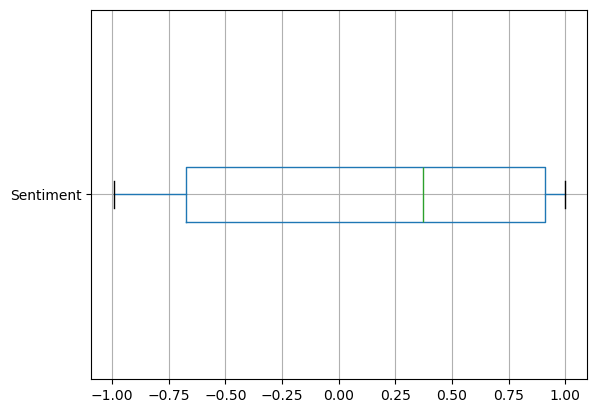

In [24]:
df.boxplot(column=['Sentiment'], vert=False)

<Axes: >

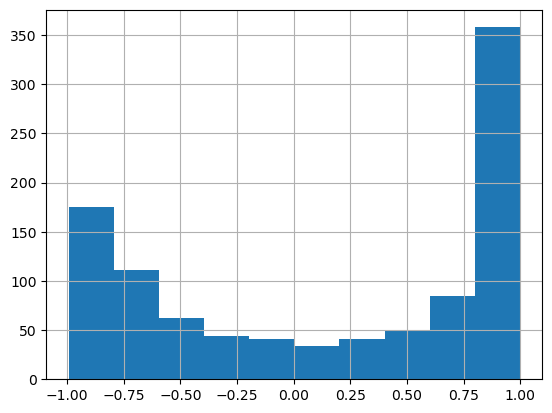

In [25]:
df['Sentiment'].hist()

### From the boxplot and histogram above we can see the left-skewness, since the median of 0.37 is to the right of the mean of 0.15. The inverted bell-shape of the histogram is to be expected, since customers who are most pleased or displeased are most likely to leave reviews.